# CS6103 Assignment 3
## Machine Learning Diagnosis of Rice Leaf Diseases with scikit-learn
#### Jaime Pang, John Chai (M20604)

## Problem Description
Plant diseases are one of the major factors that lead to decreased yield and quality in agricultural crops, spelling a huge problem for farmers and endangering their livelihoods. In order to prevent loss of crops to diseases, it is imperative that farmers are able to accurately diagnose plant diseases quickly and administer the requisite treatment so as to mitigate the damage done to crops. However, it is difficult to ensure a constant monitoring of crops and even so, farmers might not be able to identify a disease on sight due to lack of experience. But with the advent of machine learning and agricultural AI, it is now possible to automate the detection of such diseases so that farmers can more efficiently mitigate the damage done to their crops by plant diseases.

## Dataset and Objectives
A dataset of iamges of diseased rice leaves was obtained from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Rice+Leaf+Diseases. The dataset was collected by Dharmsinh Desai University, Gujarat, India, and features images of rice plants afflicted with 3 types of diseases: Bacterial leaf blight, Brown spot and Leaf smut (Top to bottom). 
Each category contains 40 images of leaves. Of each set of 40, 36 were used for training and 4 were used for testing.
<img src="training/Bacterial leaf blight/DSC_0365.JPG" width="300px"><img src="training/Brown spot/DSC_0100.JPG" width="300px"><img src="training/Leaf smut/DSC_0309.JPG" width="300px">
 
The model here aims to be able to take a image of a diseased leaf as an input, and predict its corresponding disease type based on these 3 diseases.

In [71]:
import skimage
from skimage import io
import skimage.exposure
import skimage.transform
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage import filters
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
np.set_printoptions(threshold=np.inf)

## Loading dataset
The dataset is loaded from the folder entitled 'training'

In [60]:
ic = io.imread_collection('training\*\*.jpg')
print(type(ic[0]))
y = np.asarray(40 * ['Bacterial leaf blight'] + 40 * ['Brown spot'] + 40 * ['Leaf smut'])
print((y))

<class 'numpy.ndarray'>
['Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Bacterial leaf blight' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'B

#### Preprocessed dataset

(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)


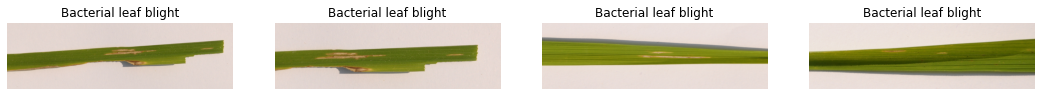

In [61]:
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for i in range(4):
    axes[i].axis('off')
    print(ic[i].shape)
    axes[i].imshow(ic[i])
    axes[i].set_title(y[i])

## Data preprocessing
Data needs to be processed first in order to eliminate any confounding variables in the images (e.g. brightness) that might confuse the training of the model and hinder the accuracy of predictions. Using skimage, the images are first cropped to 300 x 100 and the brightness is adjusted to standardise the colours of the background.

(0, 259, 3081, 688)
(3081, 897)
0.7027117249065278


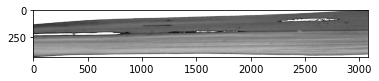

In [62]:
def exposure(img):
    #plt.imshow(imgg)
    #return skimage.exposure.adjust_log(imgg)
    return skimage.exposure.adjust_gamma(img, gamma=0.5,gain=1)

def resize(img):
    return skimage.transform.resize(img, (100,300))
    #https://www.kaggle.com/rio114/cropping-with-normlized-aspect-ratio
    #canny_edges = cv2.Canny(img,300,300)
    '''
    v = img.shape[0] # vertial pixels
    h = img.shape[1] # horizontal pixels 

    ver = int(h/2)
    cnt = []
    for i in range(canny_edges.shape[0]-ver):
        cnt.append(canny_edges[i:i+ver,:].sum()/255) # moving rectangle 

    cnt_arr = np.array(cnt)
    i = cnt_arr.argmax()

    Img_cropped = Image.fromarray(np.uint8(img[i:i+ver,:]))
    return Img_cropped
    '''
def deletebg(img):
    #use for getting rid of bg
    imgray = rgb2gray(img)
    thresh_val = threshold_mean(imgray)
    mask = np.where(imgray > thresh_val, 0, 1)
    #print(imgray.shape)
    for i in range(len(imgray)):
        for j in range(len(imgray[0])):
            if (mask[i][j]<1):
                imgray[i][j] = 0
    
    im2 = Image.fromarray(imgray)
    print(im2.getbbox())
    print(im2.size)
    im2 = im2.crop(im2.getbbox())
    print(thresh_val)
    return (np.array(im2))
    
#img = cv2.imread("training/Bacterial leaf blight/DSC_0365.JPG")
img = ic[9]
plt.imshow(deletebg(img), cmap='Greys')

In [63]:
#Split into train and test
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    ic,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=42,
)

X_train = np.asarray(X_train)
print(len(X_train))
print(type(X_train))
y_train = np.asarray(y_train)


108
<class 'numpy.ndarray'>


In [64]:
for i in range(len(X_train)):
    X_train[i] = resize(X_train[i])
    print(X_train[i].shape)
    print(i)

(100, 300, 3)
0
(100, 300, 3)
1
(100, 300, 3)
2
(100, 300, 3)
3
(100, 300, 3)
4
(100, 300, 3)
5
(100, 300, 3)
6
(100, 300, 3)
7
(100, 300, 3)
8
(100, 300, 3)
9
(100, 300, 3)
10
(100, 300, 3)
11
(100, 300, 3)
12
(100, 300, 3)
13
(100, 300, 3)
14
(100, 300, 3)
15
(100, 300, 3)
16
(100, 300, 3)
17
(100, 300, 3)
18
(100, 300, 3)
19
(100, 300, 3)
20
(100, 300, 3)
21
(100, 300, 3)
22
(100, 300, 3)
23
(100, 300, 3)
24
(100, 300, 3)
25
(100, 300, 3)
26
(100, 300, 3)
27
(100, 300, 3)
28
(100, 300, 3)
29
(100, 300, 3)
30
(100, 300, 3)
31
(100, 300, 3)
32
(100, 300, 3)
33
(100, 300, 3)
34
(100, 300, 3)
35
(100, 300, 3)
36
(100, 300, 3)
37
(100, 300, 3)
38
(100, 300, 3)
39
(100, 300, 3)
40
(100, 300, 3)
41
(100, 300, 3)
42
(100, 300, 3)
43
(100, 300, 3)
44
(100, 300, 3)
45
(100, 300, 3)
46
(100, 300, 3)
47
(100, 300, 3)
48
(100, 300, 3)
49
(100, 300, 3)
50
(100, 300, 3)
51
(100, 300, 3)
52
(100, 300, 3)
53
(100, 300, 3)
54
(100, 300, 3)
55
(100, 300, 3)
56
(100, 300, 3)
57
(100, 300, 3)
58
(100, 3

(100, 300, 3)
(100, 300, 3)
(100, 300, 3)
(100, 300, 3)


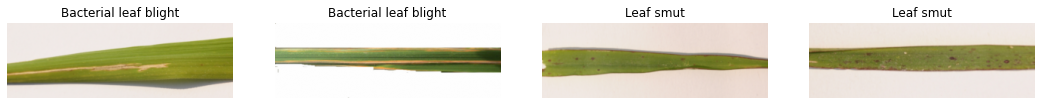

In [65]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()

for i in range(4):
    axes[i].axis('off')
    #axes[i].imshow(X_train[i])
    print(X_train[i].shape)
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[i])
    
#is still broken but whatever


(100, 300, 3)
0.7080825452121439
(100, 300)
(100, 300, 3)
0.7283314841380399
(100, 300)
(100, 300, 3)
0.6754323153416053
(100, 300)
(100, 300, 3)
0.6841991771982229
(100, 300)


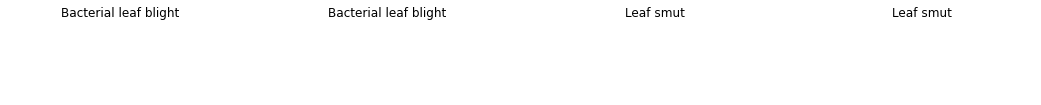

In [85]:
#canny test
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()

for i in range(4):
    axes[i].axis('off')
    #axes[i].imshow(X_train[i])
    print(X_train[i].shape)
    upp = skimage.filters.threshold_otsu(rgb2gray(X_train[i]))
    print(upp)
    low = 0.5 * upp
    feature = cv2.Canny(np.uint8(X_train[i]),-2,1)
    print(feature.shape)
    axes[i].imshow(feature, cmap='binary')
    axes[i].set_title(y_train[i])

In [29]:
print(X_train[2].size)
print(X_train[7].size)
print(X_train[20].size)

30000
90000
90000


## Display processed

# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for i in range(4):
    axes[i].axis('off')
    print(ic[i].shape)
    axes[i].imshow(ic[i], cmap='Greys')
    axes[i].set_title(y[i])

import sklearn
from sklearn import svm
from sklearn import datasets

#### Processed dataset
Yen thresholding used to get image features

In [42]:
#prep training data
from skimage.color import rgb2gray
from skimage import filters

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C019AFB00>,
       dtype=object))

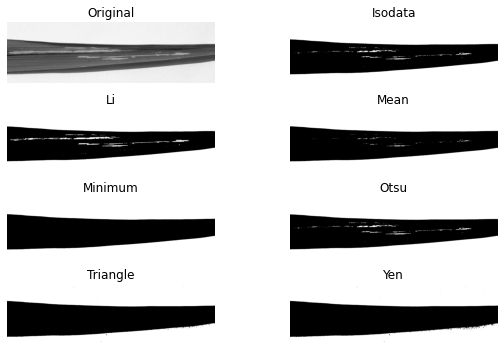

In [45]:
filters.try_all_threshold(rgb2gray(X_train[10]))

In [92]:
def oned(img):
    imgg = rgb2gray(img)
    
    thresh_val = filters.threshold_yen(imgg)
    mask = np.where(imgg > thresh_val, 1, 0)
    #print(thresh_val)

    # Make sure the larger portion of the mask is considered background
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)
    
    return mask

for i in range(len(X_train)):
    X_train[i] = oned(X_train[i])

0.4776239560355392
0.990685213694853
0.8483764414828431
0.34549470052083336
0.2079380438112745
0.813508314185049
0.3743120565257353
0.47795187959558827
0.49835924172794116
0.45480696231617646
0.8491934696691177
0.4127804511335785
0.6045068359375
0.4101413694852941
0.8272915088848039
0.3585362630208333
0.4191633218443628
0.3970414445465686
0.37080673177083334
0.344320168504902
0.38644079120710784
0.8681319041053922
0.3392514476102941
0.21526811351102942
0.8589497411151962
0.5444686251531863
0.7553857169117647
0.4726868144914216
0.870898534007353
0.3386810746017157
0.8633598085171569
0.28340133731617645
0.32706197074142157
0.41545598422181373
0.870129915747549
0.8965766574754901
0.4776143244485294
0.8535597418811274
0.3525733049938725
0.8689635945159313
0.33736312346813724
0.47136902343750003
0.35638677696078436
0.37771725337009804
0.8472245772058824
0.4731804664522059
0.4005873131127451
0.46756133118872556
0.8598670680147058
0.8322199456188726
0.3952144247855392
0.3139002504595588
0.331

(897, 3081)
(897, 3081)
(897, 3081)
(897, 3081)


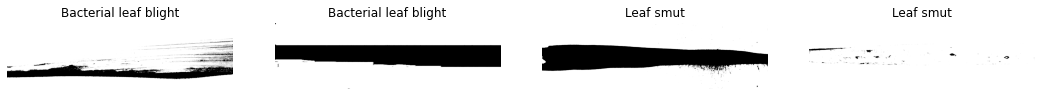

In [97]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()

for i in range(4):
    axes[i].axis('off')
    #axes[i].imshow(X_train[i])
    
    X_train[i] = rgb2gray(X_train[i])
    print(X_train[i].shape)
    axes[i].imshow(X_train[i], cmap='Greys')
    axes[i].set_title(y_train[i])
    
#is still broken but whatever

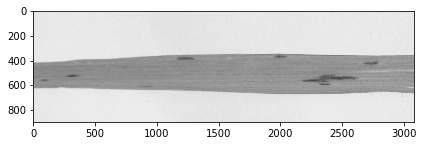

from skimage import filters

thresh_val = filters.threshold_yen(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

print(thresh_val)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

plt.imshow(mask)

filters.try_all_threshold(im_gray)
#yen filter looks best

#use for getting rid of bg
from skimage.filters import threshold_mean
thresh_val = threshold_mean(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

print(thresh_val)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

plt.imshow(mask)

In [8]:

print(X_train[0].shape)
shape = X_train[0].shape[0]*X_train[0].shape[1]*X_train[0].shape[2]
print(shape)

(100, 300, 3)
90000


In [9]:
a = np.asarray(108* [shape * [0]])

for i in range(0, len(X_train)):
    a[i] = (X_train[i].reshape(shape).T)
    print(i)
    
print(type(a[i]))

'''
for i in range(0,len(X_train)-1):
    X_train[i] = X_train[i].reshape(X_train[i].shape[0]*X_train[i].shape[1]*X_train[i].shape[2]).T
print(X_train.shape)
print(X_train[1].shape)
'''
print (len(a))
a = np.asarray(a)
print(a.shape)

print(len(a[0]))
print(a[0].shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
<class 'numpy.ndarray'>
108
(108, 90000)
90000
(90000,)


## Training
Data is first split into training and testing set

### Support Vector Machine (SVM)

In [102]:
#test
tt = X_train
for i in range(len(X_train)):
    tt[i] = X_train[i].reshape(-1)
print(tt[7])
print(tt.shape)
#print(y_train)

[0 1 0 ... 0 0 0]
(108,)


In [10]:
'''
tt=9 * [5 * [8]]
tt = np.asarray(tt)
print(tt)
print(tt.shape)
'''
print(a.shape)

from sklearn import svm
clf = svm.SVC()
clf.fit(a, y_train)

(108, 90000)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
#test processing
for i in range(len(X_test)):
    X_test[i] = (skimage.transform.resize(X_test[i], (100,300))).reshape(shape).T
print(len(X_test))

12


In [14]:
y_pred = clf.predict(X_test)
print(y_pred)

['Brown spot' 'Brown spot' 'Brown spot' 'Brown spot' 'Brown spot'
 'Brown spot' 'Brown spot' 'Brown spot' 'Brown spot' 'Brown spot'
 'Brown spot' 'Brown spot']


### Naive Bayes

### K Nearest Neighbours

## References
[1] https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/

[2] https://kapernikov.com/tutorial-image-classification-with-scikit-learn/

[3] https://www.kaggle.com/rio114/cropping-with-normlized-aspect-ratio